In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [26]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('2021_public_lar.csv',usecols=['state_code','derived_loan_product_type','derived_dwelling_category'
                                                ,'derived_race','applicant_race_1','derived_sex','action_taken',
                                                'loan_purpose','business_or_commercial_purpose',
                                                'loan_amount','combined_loan_to_value_ratio','interest_rate',
                                                'loan_term','property_value','occupancy_type','income',
                                                'debt_to_income_ratio','applicant_credit_score_type','denial_reason_1'])

C:\Users\josep\AppData\Local\Temp\ipykernel_29516\3382581888.py:2: DtypeWarning: Columns (22,23,31,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021_public_lar.csv',usecols=['state_code','derived_loan_product_type','derived_dwelling_category'


In [27]:
df_ny = df[(df["state_code"] == 'NY')]
df_ny = df_ny[df_ny['derived_loan_product_type'] == 'Conventional:First Lien']
df_ny = df_ny.loc[df_ny['loan_purpose'].isin([1])]
df_ny = df_ny.loc[df_ny['business_or_commercial_purpose'].isin([2])]
df_ny = df_ny[df_ny['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built']
df_ny = df_ny.loc[df_ny['occupancy_type'].isin([1])]
df_ny['combined_loan_to_value_ratio'] = df_ny['combined_loan_to_value_ratio'].astype(str).astype(float)
df_ny['interest_rate'] = df_ny['interest_rate'].astype(str).astype(float)
df_ny['property_value'] = df_ny['property_value'].astype(str).astype(float)
#df_ny['debt_to_income_ratio'] = df_ny['debt_to_income_ratio'].astype(str).astype(float)
df_ny = df_ny.loc[df_ny['action_taken'].isin([1,3])]
df_ny['action_taken'] = df['action_taken'].replace({3: 0})


In [28]:
df_ny.dtypes

state_code                         object
derived_loan_product_type          object
derived_dwelling_category          object
derived_race                       object
derived_sex                        object
action_taken                        int64
loan_purpose                        int64
business_or_commercial_purpose      int64
loan_amount                         int64
combined_loan_to_value_ratio      float64
interest_rate                     float64
loan_term                          object
property_value                    float64
occupancy_type                      int64
income                            float64
debt_to_income_ratio               object
applicant_credit_score_type         int64
applicant_race_1                  float64
denial_reason_1                     int64
dtype: object

In [30]:
# Drop any rows with missing data
df_ny = df_ny.dropna()


columns_to_drop = ['state_code', 'derived_loan_product_type', 'derived_dwelling_category','loan_purpose', 'business_or_commercial_purpose', 
                   'applicant_credit_score_type', 'denial_reason_1','combined_loan_to_value_ratio','derived_race','derived_sex',
                   'debt_to_income_ratio']
# Drop the specified columns
df_ny = df_ny.drop(columns_to_drop, axis=1)


In [31]:
df_ny.dtypes

action_taken          int64
loan_amount           int64
interest_rate       float64
loan_term            object
property_value      float64
occupancy_type        int64
income              float64
applicant_race_1    float64
dtype: object

In [32]:
# Convert categorical variables to numerical values using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['applicant_race_1','loan_amount','interest_rate','property_value','income']
#categorical_columns = ['state_code', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_race', 'derived_sex', 'loan_purpose', 'business_or_commercial_purpose', 'applicant_credit_score_type', 'applicant_race_1', 'denial_reason_1']
for column in categorical_columns:
    df_ny[column] = label_encoder.fit_transform(df_ny[column])

In [33]:
# Assuming 'action_taken' is the target variable (approval status)
X = df_ny.drop('action_taken', axis=1)
y = df_ny['action_taken']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [36]:
y_pred = dt_classifier.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[24943]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     24943

    accuracy                           1.00     24943
   macro avg       1.00      1.00      1.00     24943
weighted avg       1.00      1.00      1.00     24943



<AxesSubplot: >

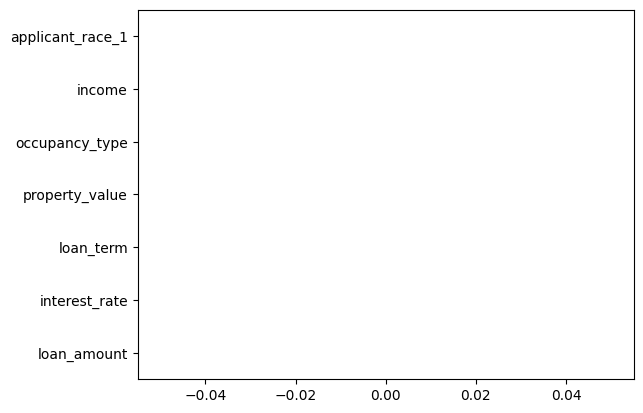

In [37]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')


In [38]:
importances = dt_classifier.feature_importances_
print("Feature importances:", importances)


Feature importances: [0. 0. 0. 0. 0. 0. 0.]
